In [1]:
!pip3 install git+https://github.com/thilowrona/fatbox.git

  Cloning https://github.com/thilowrona/fatbox.git to /tmp/pip-req-build-577h0_91
  Running command git clone --filter=blob:none --quiet https://github.com/thilowrona/fatbox.git /tmp/pip-req-build-577h0_91
  Resolved https://github.com/thilowrona/fatbox.git to commit 456444e75fd58ef1e441d9541babca4218448159
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/ulikoehler/cv_algorithms.git to /tmp/pip-install-oscczekx/cv-algorithms_59f2799fa90940b5afdc8f6ce619b5cf
  Running command git clone --filter=blob:none --quiet https://github.com/ulikoehler/cv_algorithms.git /tmp/pip-install-oscczekx/cv-algorithms_59f2799fa90940b5afdc8f6ce619b5cf
  Resolved https://github.com/ulikoehler/cv_algorithms.git to commit 67b6a04c4d0d41e5c46d259a44dce53eb8d36dc4
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 

In [2]:
!git clone https://github.com/thilowrona/fatbox_tutorials

Cloning into 'fatbox_tutorials'...
remote: Enumerating objects: 423, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 423 (delta 13), reused 12 (delta 12), pack-reused 403 (from 1):   2% (9/423)Receiving objects:   7% (30/423), 8.86 MiB | 17.69 MiB/sReceiving objects:  11% (47/423), 8.86 MiB | 17.69 MiB/sReceiving objects:  18% (77/423), 8.86 MiB | 17.69 MiB/sReceiving objects:  25% (108/423), 13.14 MiB | 11.78 MiB/sReceiving objects:  30% (127/423), 13.14 MiB | 11.78 MiB/sReceiving objects:  38% (161/423), 20.85 MiB | 11.69 MiB/sReceiving objects:  42% (178/423), 20.85 MiB | 11.69 MiB/sReceiving objects:  46% (195/423), 28.34 MiB | 12.41 MiB/sReceiving objects:  49% (208/423), 28.34 MiB | 12.41 MiB/sReceiving objects:  51% (216/423), 28.34 MiB | 12.41 MiB/sReceiving objects:  52% (220/423), 33.82 MiB | 11.67 MiB/sReceiving objects:  84% (357/423), 33.82 MiB | 11.67 MiB/sReceiving objects:  87% (369/423), 33.82 MiB | 11.67

In [8]:
pip install scikit-image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 64.0 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


In [11]:
import numpy as np 
import networkx as nx
import pickle
import cv2

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.spatial import distance_matrix

from sys import stdout

from fatbox.preprocessing import simple_threshold_binary, skeleton_guo_hall, array_to_points
from fatbox.edits import label_components, simplify
from fatbox.plots import plot_components

from PIL import Image

In [12]:
image_path = 'seismic-1240_1240_398_0.png'  # Replace with your image path
image = Image.open(image_path).convert('L')  # Convert to grayscale
strain_rate = np.array(image)  # Convert to NumPy array

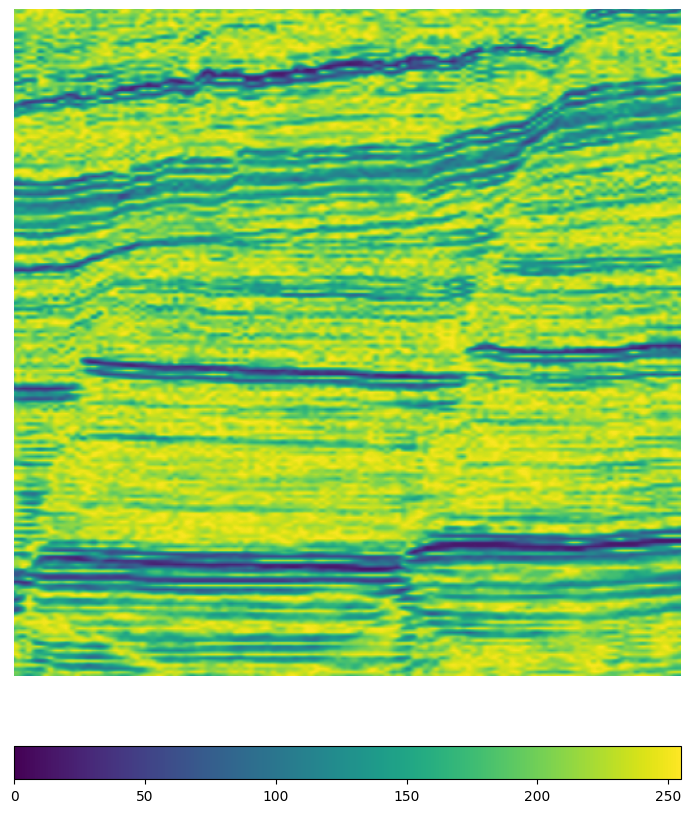

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(strain_rate, vmin=0)
plt.axis('off')
divider = make_axes_locatable(ax)
cax = divider.new_vertical(size="5%", pad=0.7, pack_start=True)
fig.add_axes(cax)
fig.colorbar(im, cax=cax, orientation="horizontal")
plt.show()
     

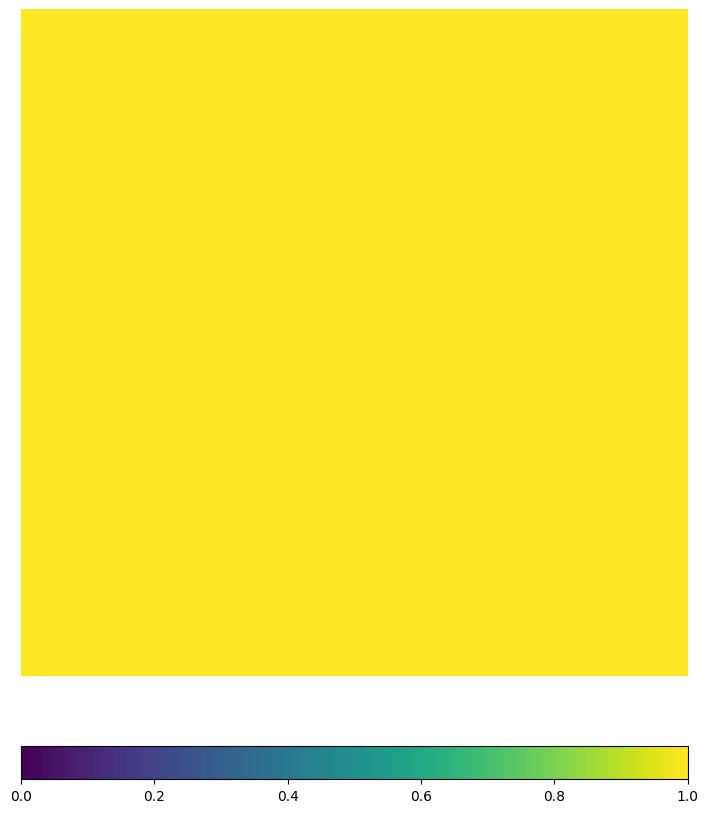

In [14]:
threshold = simple_threshold_binary(strain_rate, 1.2e-14)

fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(threshold, vmin=0, vmax=1)
plt.axis('off')
divider = make_axes_locatable(ax)
cax = divider.new_vertical(size="5%", pad=0.7, pack_start=True)
fig.add_axes(cax)
fig.colorbar(im, cax=cax, orientation="horizontal")
plt.show()
     

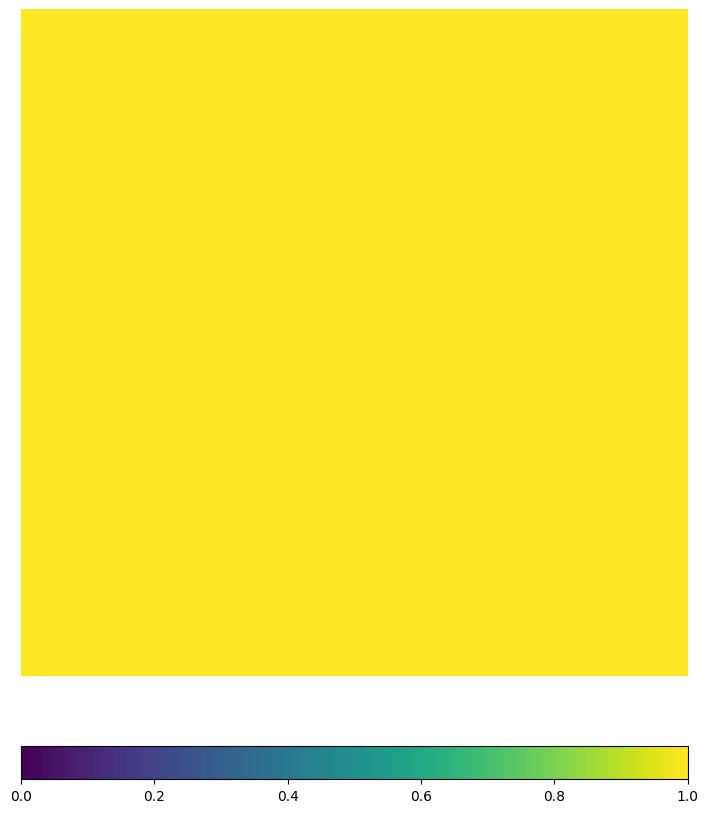

In [15]:
skeleton = skeleton_guo_hall(threshold)

fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(skeleton, vmin=0, vmax=1)
plt.axis('off')
divider = make_axes_locatable(ax)
cax = divider.new_vertical(size="5%", pad=0.7, pack_start=True)
fig.add_axes(cax)
fig.colorbar(im, cax=cax, orientation="horizontal")
plt.show()